In [14]:
pwd

'/content/drive/My Drive/deep-text-recognition-benchmark/deep-text-recognition-benchmark'

In [9]:
cd drive/My Drive/deep-text-recognition-benchmark/deep-text-recognition-benchmark

[Errno 2] No such file or directory: 'drive/My Drive/deep-text-recognition-benchmark/deep-text-recognition-benchmark'
/content/drive/My Drive/deep-text-recognition-benchmark/deep-text-recognition-benchmark


In [10]:
! sudo apt install tesseract-ocr 
! pip install pytesseract
! pip install pillow
! pip install fire

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import tesseract_box
tesseract_box.tesseract_box('eng_sing.png')

In [19]:
output = !CUDA_VISIBLE_DEVICES=0 python3 demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder demo_image/ \
--saved_model TPS-ResNet-BiLSTM-Attn.pth

,img,id,label,conf
0,,demo_image/01_0000_41.png,stronger,0.9999
1,,demo_image/01_0001_35.png,than,1.0000
2,,demo_image/02_0002_37.png,its,0.9717
3,,demo_image/02_0003_35.png,beautiful,0.9324
4,,demo_image/02_0004_43.png,day,0.9996
5,,demo_image/02_0005_41.png,outside,0.9999
6,,demo_image/03_0006_35.png,birds,1.0000
7,,demo_image/03_0007_25.png,are,1.0000
8,,demo_image/03_0008_41.png,singing,0.9999
9,,demo_image/03_0009_35.png,flowers,0.9901

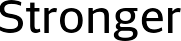
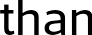
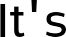
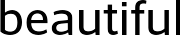
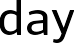
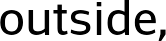
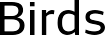
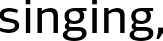
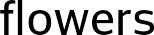
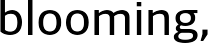
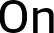
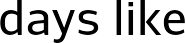
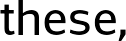
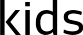
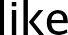
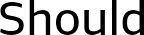
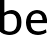
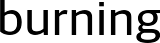
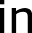
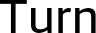
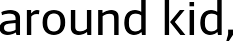
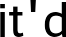
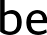
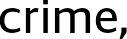
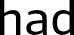
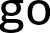
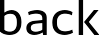
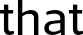
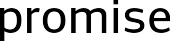
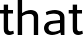
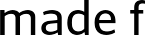
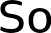
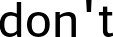
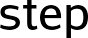
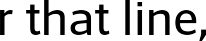
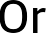
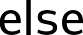
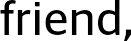
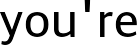
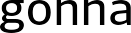
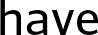
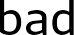
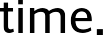
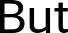
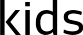
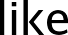
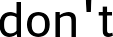
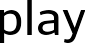
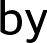
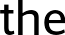
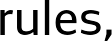
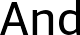
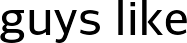
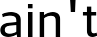
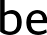
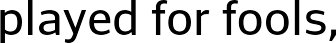
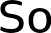
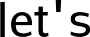
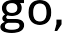
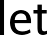
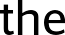
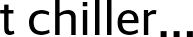
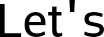
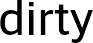
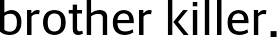

In [20]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd
i_test_list = []
data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 
  i_test_list.append([label + " ",filename[11:13],filename[19:21]])

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))

In [ ]:
tesseract_box.get_text(i_test_list)

In [ ]:
#tesseract_box.delete_img('./demo_image/')